In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv' , usecols = ['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head(4)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000


In [7]:
X =df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [9]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [11]:
y_train.head()

328    1
73     0
253    0
719    0
666    0
Name: Survived, dtype: int64

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6293706293706294


In [16]:
np.mean(cross_val_score(dt,X,y,scoring ='accuracy' , cv =10))

0.6345070422535211

In [18]:
kbinage = KBinsDiscretizer(n_bins=10 , encode= 'ordinal' , strategy='quantile')
kbinfare = KBinsDiscretizer(n_bins=10 , encode= 'ordinal' , strategy='quantile') 

In [19]:
trf = ColumnTransformer([
    ('first' ,kbinage,[0]),
    ('second',kbinfare,[1])
])

In [20]:
X_train_trf = trf.fit_transform(X_train) 
X_test_trf = trf.transform(X_test)

In [22]:
trf.named_transformers_['first'].n_bins_

array([10])

In [25]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
       50.  , 80.  ])], dtype=object)

In [27]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [35]:
output['age_labels'] = pd.cut(x = X_train['Age'],bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']= pd.cut(x = X_train['Fare'],bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [36]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
657,32.0,6.0,15.5000,4.0,"(28.5, 32.0]","(13.0, 15.75]"
212,22.0,3.0,7.2500,0.0,"(19.0, 22.0]","(0.0, 7.75]"
314,43.0,8.0,26.2500,6.0,"(42.0, 50.0]","(26.0, 29.125]"
771,48.0,8.0,7.8542,1.0,"(42.0, 50.0]","(7.75, 7.896]"
834,18.0,1.0,8.3000,2.0,"(14.0, 19.0]","(7.896, 9.225]"


In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [39]:
X_trf =trf.fit_transform(X)
np.mean(cross_val_score(clf,X_trf,y,cv=10,scoring='accuracy'))

0.682140062597809

In [46]:
def binning(bins,strategy):
    kbinage = KBinsDiscretizer(n_bins=bins , encode= 'ordinal' , strategy=strategy)
    kbinfare = KBinsDiscretizer(n_bins=bins , encode= 'ordinal' , strategy= strategy) 
    
#     column transormer
    trf = ColumnTransformer([
        ('first' , kbinage , [0]),
        ('second' ,kbinfare , [1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf ,y,cv =10 , scoring='accuracy')))
    
    plt.figure(figsize =(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before trf Age")
    
    plt.subplot(122)
    plt.hist(X_trf[:,0] , color ='red')
    plt.title("After trf Age")
    
    plt.show()
    
    plt.figure(figsize =(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before trf Fare")
    
    plt.subplot(122)
    plt.hist(X_trf[:,1] , color ='red')
    plt.title("After trf Fare")
    
    

C:\Users\Abhishek\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "
C:\Users\Abhishek\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


0.6655320813771518


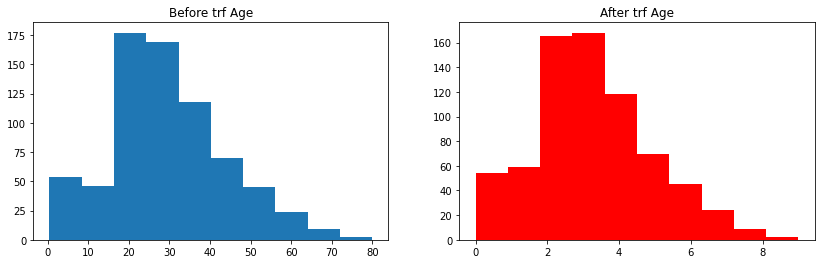

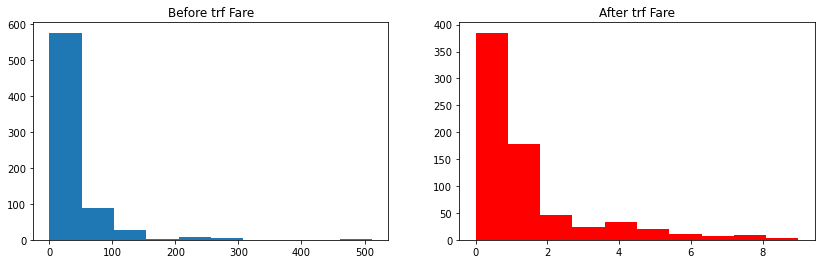

In [51]:
binning(10 , 'kmeans')

# Binariztion 

In [52]:
from sklearn.preprocessing import Binarizer

In [53]:
data = pd.read_csv('train.csv')

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.drop(columns = ['PassengerId','Pclass' ,'Name','Sex' , 'Ticket','Cabin','Embarked'] , inplace=True)

In [57]:
data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [60]:
data.isnull().sum() , data.shape

(Survived      0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 dtype: int64,
 (891, 5))

In [61]:
data.dropna(inplace  =True)

In [62]:
data.isna().sum()

Survived    0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [63]:
data['family'] = data['SibSp']  + data['Parch']

In [64]:
data.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [65]:
data.drop(columns = ['SibSp' , "Parch"] , inplace = True)

In [66]:
data

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [69]:
X_train,X_test , y_train,y_test = train_test_split(data.iloc[:,1:] , data.iloc[:,0],test_size=0.2 ,random_state=42)

In [70]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred_ = clf.predict(X_test)

accuracy_score(y_test , y_pred_)

0.6363636363636364

In [71]:
np.mean(cross_val_score(clf , data.iloc[:,1:],data.iloc[:,0] , scoring ='accuracy' , cv =10))

0.6415297339593113

In [77]:
# let's use Binarizer on family

trf = ColumnTransformer([
    ('family' ,Binarizer() ,['family'])
])
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

clf.fit(X_train_trf,y_train)

y_pred_binarizer = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred_binarizer)



0.5804195804195804

In [78]:
X_trf = trf.fit_transform(data.iloc[:,1:])

np.mean(cross_val_score(DecisionTreeClassifier() , X_trf , data.iloc[:,0] , cv =10 ,scoring='accuracy'))

0.6080985915492958